In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pandas_ta as ta
import yfinance as yf

%matplotlib widget
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

dfs = []
# directory_path = "data/qqq-options-data-2020-2022"
directory_path = "data/spy-options-data-2020-2022"

for dirname, _, filenames in os.walk(directory_path):
    for filename in filenames:
        data_path = os.path.join(dirname, filename)
        print(data_path)
        dfs.append(pd.read_csv(data_path, low_memory=False))

df_raw = pd.concat(dfs)
columns = df_raw.columns
columns = [s.replace("[", "") for s in columns]
columns = [s.replace("]", "") for s in columns]
columns = [s.replace(" ", "") for s in columns]
df_raw.columns = columns
df_raw

data/spy-options-data-2020-2022/spy_2020_2022.csv


,QUOTE_UNIXTIME,QUOTE_READTIME,QUOTE_DATE,QUOTE_TIME_HOURS,UNDERLYING_LAST,EXPIRE_DATE,EXPIRE_UNIX,DTE,C_DELTA,C_GAMMA,C_VEGA,C_THETA,C_RHO,C_IV,C_VOLUME,C_LAST,C_SIZE,C_BID,C_ASK,STRIKE,P_BID,P_ASK,P_SIZE,P_LAST,P_DELTA,P_GAMMA,P_VEGA,P_THETA,P_RHO,P_IV,P_VOLUME,STRIKE_DISTANCE,STRIKE_DISTANCE_PCT
0,1630526400,2021-09-01 16:00,2021-09-01,16.0,451.85,2021-09-01,1630526400,0.0,1.000000,0.000000,0.000000,0.000000,0.005170,,1.000000,182.650000,1 x 1,181.090000,182.310000,270.0,0.000000,0.010000,0 x 2239,0.010000,-0.000240,0.000000,0.000040,-0.005090,0.000000,3.412490,3.000000,181.9,0.402
1,1630526400,2021-09-01 16:00,2021-09-01,16.0,451.85,2021-09-01,1630526400,0.0,1.000000,0.000000,0.000000,0.000000,0.005270,,,0.000000,1 x 1,176.090000,177.310000,275.0,0.000000,0.010000,0 x 2679,0.010000,-0.000630,0.000030,0.000190,-0.004800,0.000000,3.297370,0.000000,176.9,0.391
2,1630526400,2021-09-01 16:00,2021-09-01,16.0,451.85,2021-09-01,1630526400,0.0,1.000000,0.000000,0.000000,0.000000,0.005690,,25.000000,157.750000,1 x 1,171.090000,172.310000,280.0,0.000000,0.010000,0 x 2679,0.010000,0.000000,0.000000,-0.000230,-0.005340,0.000000,3.183300,11.000000,171.9,0.380
3,1630526400,2021-09-01 16:00,2021-09-01,16.0,451.85,2021-09-01,1630526400,0.0,1.000000,0.000000,0.000000,0.000000,0.005300,,25.000000,153.450000,1 x 1,166.140000,167.300000,285.0,0.000000,0.010000,0 x 2679,0.010000,-0.000160,0.000040,0.000380,-0.005320,0.000000,3.072170,50.000000,166.9,0.369
4,1630526400,2021-09-01 16:00,2021-09-01,16.0,451.85,2021-09-01,1630526400,0.0,1.000000,0.000000,0.000000,0.000000,0.005340,,25.000000,147.760000,1 x 1,161.090000,162.310000,290.0,0.000000,0.010000,0 x 2679,0.010000,-0.000680,0.000000,0.000450,-0.005150,0.000000,2.962300,0.000000,161.9,0.358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3589074,1614373200,2021-02-26 16:00,2021-02-26,16.0,380.36,2023-12-15,1702674000,1022.0,0.108570,0.001560,1.182900,-0.009830,0.990150,0.186590,3.000000,5.860000,2 x 2,4.000000,7.000000,570.0,196.200000,200.500000,50 x 2,0.000000,-0.974300,0.000000,0.000000,-0.009830,-15.938490,0.000340,,189.6,0.499
3589075,1614373200,2021-02-26 16:00,2021-02-26,16.0,380.36,2023-12-15,1702674000,1022.0,0.100860,0.001540,1.123300,-0.008980,0.925760,0.184770,0.000000,4.900000,1 x 5,4.220000,5.800000,575.0,200.920000,205.500000,200 x 1,0.000000,-0.973370,0.000000,0.000000,-0.009730,-16.078100,0.000000,,194.6,0.512
3589076,1614373200,2021-02-26 16:00,2021-02-26,16.0,380.36,2023-12-15,1702674000,1022.0,0.100310,0.001470,1.115060,-0.009170,0.914390,0.187930,10.000000,4.400000,2 x 10,4.000000,6.010000,580.0,205.000000,210.000000,2 x 1,0.000000,-0.973620,0.000000,0.000000,-0.009880,-16.217570,0.000410,,199.6,0.525
3589077,1614373200,2021-02-26 16:00,2021-02-26,16.0,380.36,2023-12-15,1702674000,1022.0,0.090500,0.001380,1.037350,-0.008630,0.833080,0.184190,7.000000,4.000000,1 x 1000,3.000000,5.760000,585.0,209.500000,214.500000,2 x 2,0.000000,-0.973390,0.000000,0.000000,-0.009300,-16.357500,-0.000370,,204.6,0.538


In [2]:
# df_raw.info()

In [3]:
date_columns = ["QUOTE_READTIME", "QUOTE_DATE", "EXPIRE_DATE"]
numeric_cols = df_raw.columns.to_list()
numeric_cols.remove("QUOTE_READTIME")
numeric_cols.remove("QUOTE_DATE")
numeric_cols.remove("EXPIRE_DATE")

df_numeric = df_raw.drop(columns=date_columns)

for i in numeric_cols:
    df_numeric[i] = pd.to_numeric(df_numeric[i], errors="coerce")

df_final = df_numeric.drop(columns=["C_SIZE", "P_SIZE"])
# df_final = df_final.drop(columns=date_columns)
# df_final.info()

In [4]:
# df_final.hist(column="DTE", bins=100)

### As we can see, there is a heavy skew towards shorter contracts in this dataset. 

In order to use this data for a viable trading strategy, we may want to consider truncating some longer duration contracts. The strategy proposed by https://tastytrade.com/, an options trading brokerage, recommends staying in the 45-60 day range when using the majority of trading strategies. We will explore the statistical backing behind this recommendation.

P.S. - I have no affiliation with TastyTrade, just a fan of their work and free learning materials!

In [5]:
# pd.DataFrame(df_final.DTE.value_counts()).head(20)
# df_final

In [6]:
# plt.scatter(
#     pd.to_datetime(df_numeric["QUOTE_UNIXTIME"], unit="s"), df_numeric["UNDERLYING_LAST"], color="black", alpha=0.003
# )
# plt.ylabel("Price in USD")
# plt.xlabel("Date")
# plt.title("Stock Price")

In [13]:
df_option_history = df_final.copy()

df_option_history["EXPIRE_UNIX"] = pd.to_datetime(df_option_history.EXPIRE_UNIX, unit="s", utc=True)
df_option_history["QUOTE_UNIXTIME"] = pd.to_datetime(df_option_history.QUOTE_UNIXTIME, unit="s", utc=True).apply(
    lambda x: pd.Timestamp(x).round(freq="D")
)

df_option_history.set_index(pd.DatetimeIndex(df_option_history.QUOTE_UNIXTIME), inplace=True)
df_option_history.drop(columns=["QUOTE_UNIXTIME"], inplace=True)
df_option_history.sort_index(inplace=True)

df_option_history["OPTION_ID"] = df_option_history["EXPIRE_UNIX"].astype(str) + df_option_history["STRIKE"].astype(str)
df_option_history["OPTION_ID"] = df_option_history["OPTION_ID"].apply(lambda x: hash(x))


def get_df_cnn_fear_greed_index():
    print("Retrieving historical ETF fear and greed index")
    import json

    with open("cnn_fear_greed_index_data.json") as f:
        cnn_fear_greed_index_data = json.load(f)

    df_fear_greed_index = pd.DataFrame(
        data=cnn_fear_greed_index_data["data"]["c:50108"]["series"][0], columns=["x", "y"]
    )
    df_fear_greed_index.set_index(
        pd.DatetimeIndex([pd.Timestamp(x, unit="s", tz="UTC") for x in df_fear_greed_index.x]),
        inplace=True,
    )
    df_fear_greed_index.rename(columns={"y": "fear_greed_index"}, inplace=True)
    df_fear_greed_index["fear_greed_index"] = df_fear_greed_index.fear_greed_index.astype(float).round()
    return df_fear_greed_index


df_fear_greed_index = get_df_cnn_fear_greed_index()
df_option_history = df_option_history.join(df_fear_greed_index, how="inner")

df_history = df_option_history.groupby(df_option_history.index).first()[["UNDERLYING_LAST", "fear_greed_index"]]
df_history.rename(columns={"UNDERLYING_LAST": "close"}, inplace=True)

CustomStrategy = ta.Strategy(
    name="Indicators",
    ta=[
        {"kind": "slope", "length": 50},
    ],
)
df_history.ta.strategy(CustomStrategy)


def get_df_product_history(product_id):
    print(f"Retrieving historical data for {product_id}")

    df_product_history = yf.Ticker(product_id).history(interval="1d", period="5y")

    timestamps = [pd.to_datetime(x, utc=True).round(freq="D") for x in df_product_history.index.values]
    timestamps_date_range = pd.date_range(start=timestamps[0], end=timestamps[-1], freq="D")
    df_product_history = df_product_history.set_index(pd.DatetimeIndex(timestamps)).reindex(
        timestamps_date_range, method="ffill"
    )

    df_product_history.ta.sma(length=50, append=True)
    df_product_history.columns = [f"{product_id}_{x}" for x in map(str.lower, df_product_history.columns)]

    return df_product_history


df_vix_history = get_df_product_history("^VIX")
df_history = df_history.join(df_vix_history)

for column in ["close", "fear_greed_index", "SLOPE_50", "^VIX_close"]:
    for days in [7, 10, 14]:
        periods = days
        df_history[f"{column}_min_{days}"] = df_history[column].rolling(window=periods, min_periods=periods).min()
        df_history[f"{column}_max_{days}"] = df_history[column].rolling(window=periods, min_periods=periods).max()

# df_option_history = df_option_history.join(df_history, how="inner")
df_option_history = df_option_history.join(df_history.drop(columns=["fear_greed_index"]), how="inner")
df_option_history["index"] = df_option_history.index
df_option_history.sort_values(by=["index", "EXPIRE_UNIX", "DTE", "STRIKE_DISTANCE_PCT"], inplace=True)

df_option_history

Retrieving historical ETF fear and greed index
Retrieving historical data for ^VIX


,QUOTE_TIME_HOURS,UNDERLYING_LAST,EXPIRE_UNIX,DTE,C_DELTA,C_GAMMA,C_VEGA,C_THETA,C_RHO,C_IV,C_VOLUME,C_LAST,C_BID,C_ASK,STRIKE,P_BID,P_ASK,P_LAST,P_DELTA,P_GAMMA,P_VEGA,P_THETA,P_RHO,P_IV,P_VOLUME,STRIKE_DISTANCE,STRIKE_DISTANCE_PCT,OPTION_ID,x,fear_greed_index,close,SLOPE_50,^VIX_open,^VIX_high,^VIX_low,^VIX_close,^VIX_volume,^VIX_dividends,^VIX_stock splits,^VIX_sma_50,close_min_7,close_max_7,close_min_10,close_max_10,close_min_14,close_max_14,fear_greed_index_min_7,fear_greed_index_max_7,fear_greed_index_min_10,fear_greed_index_max_10,fear_greed_index_min_14,fear_greed_index_max_14,SLOPE_50_min_7,SLOPE_50_max_7,SLOPE_50_min_10,SLOPE_50_max_10,SLOPE_50_min_14,SLOPE_50_max_14,^VIX_close_min_7,^VIX_close_max_7,^VIX_close_min_10,^VIX_close_max_10,^VIX_close_min_14,^VIX_close_max_14,index
2021-05-18 00:00:00+00:00,16.0,415.52,2021-05-17 20:00:00+00:00,0.0,0.12345,0.49284,0.04424,-0.02574,0.00130,0.01925,83562.0,0.02,0.02,0.03,416.0,0.52,0.71,0.62,-0.72484,0.41528,0.07277,-0.13512,-0.00719,0.03646,21844.0,0.5,0.001,-5062785815659443600,2021-05-18,35.0,415.52,NaN,18.889999,21.450001,18.809999,21.34,0,0.0,0.0,18.1922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-18 00:00:00+00:00
2021-05-18 00:00:00+00:00,16.0,415.52,2021-05-17 20:00:00+00:00,0.0,1.00000,0.00000,0.00000,-0.00055,0.01186,NaN,146404.0,0.47,0.41,0.50,415.0,0.05,0.06,0.06,-0.17946,0.46201,0.05734,-0.05469,-0.00185,0.02633,88804.0,0.5,0.001,-7565939125069918200,2021-05-18,35.0,415.52,NaN,18.889999,21.450001,18.809999,21.34,0,0.0,0.0,18.1922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-18 00:00:00+00:00
2021-05-18 00:00:00+00:00,16.0,415.52,2021-05-17 20:00:00+00:00,0.0,0.01937,0.06558,0.00979,-0.00538,0.00065,0.03270,43957.0,0.01,0.00,0.01,417.0,1.46,1.75,1.59,-0.83771,0.16103,0.05395,-0.12514,-0.00769,0.06842,9597.0,1.5,0.004,7198535364682307592,2021-05-18,35.0,415.52,NaN,18.889999,21.450001,18.809999,21.34,0,0.0,0.0,18.1922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-18 00:00:00+00:00
2021-05-18 00:00:00+00:00,16.0,415.52,2021-05-17 20:00:00+00:00,0.0,1.00000,0.00000,0.00000,0.00000,0.01099,NaN,74797.0,1.47,1.36,1.53,414.0,0.01,0.02,0.02,-0.04168,0.10189,0.02008,-0.01536,-0.00092,0.04023,111259.0,1.5,0.004,-8131984418210958188,2021-05-18,35.0,415.52,NaN,18.889999,21.450001,18.809999,21.34,0,0.0,0.0,18.1922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-18 00:00:00+00:00
2021-05-18 00:00:00+00:00,16.0,415.52,2021-05-17 20:00:00+00:00,0.0,0.01329,0.03006,0.00723,-0.00541,-0.00001,0.05094,25311.0,0.01,0.00,0.01,418.0,2.21,2.96,2.45,-0.88651,0.08903,0.04179,-0.10480,-0.00747,0.09280,3627.0,2.5,0.006,8668566444343360246,2021-05-18,35.0,415.52,NaN,18.889999,21.450001,18.809999,21.34,0,0.0,0.0,18.1922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-18 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 00:00:00+00:00,16.0,382.44,2025-12-19 21:00:00+00:00,1085.0,0.10595,0.00150,1.19348,-0.01204,1.05129,0.17770,2.0,5.71,0.59,10.00,630.0,243.00,250.50,0.00,-1.00000,0.00000,0.00000,0.00000,0.00000,NaN,NaN,247.6,0.647,-6725395816397785222,2022-12-31,38.0,382.44,0.2786,21.830000,22.400000,21.590000,21.67,0,0.0,0.0,21.8402,376.71,383.33,376.71,386.21,376.71,401.95,36.0,40.0,36.0,40.0,36.0,61.0,0.1984,0.5266,0.0444,0.5266,0.0444,0.7314,20.870001,22.139999,20.07,22.139999,20.07,22.83,2022-12-31 00:00:00+00:00
2022-12-31 00:00:00+00:00,16.0,382.44,2025-12-19 21:00:00+00:00,1085.0,0.09392,0.00140,1.09723,-0.01082,0.94207,0.17304,NaN,0.00,2.00,7.00,635.0,247.66,257.50,

In [14]:
# for c in ["UNDERLYING_LAST", "fear_greed_index"]:
#     df = df_option_history[[c]]
#     df["date"] = df.index
#     df.drop_duplicates(subset=["date", c]).plot(x="date", y=c)

df_option_history.describe().astype(str)

,QUOTE_TIME_HOURS,UNDERLYING_LAST,DTE,C_DELTA,C_GAMMA,C_VEGA,C_THETA,C_RHO,C_IV,C_VOLUME,C_LAST,C_BID,C_ASK,STRIKE,P_BID,P_ASK,P_LAST,P_DELTA,P_GAMMA,P_VEGA,P_THETA,P_RHO,P_IV,P_VOLUME,STRIKE_DISTANCE,STRIKE_DISTANCE_PCT,OPTION_ID,fear_greed_index,close,SLOPE_50,^VIX_open,^VIX_high,^VIX_low,^VIX_close,^VIX_volume,^VIX_dividends,^VIX_stock splits,^VIX_sma_50,close_min_7,close_max_7,close_min_10,close_max_10,close_min_14,close_max_14,fear_greed_index_min_7,fear_greed_index_max_7,fear_greed_index_min_10,fear_greed_index_max_10,fear_greed_index_min_14,fear_greed_index_max_14,SLOPE_50_min_7,SLOPE_50_max_7,SLOPE_50_min_10,SLOPE_50_max_10,SLOPE_50_min_14,SLOPE_50_max_14,^VIX_close_min_7,^VIX_close_max_7,^VIX_close_min_10,^VIX_close_max_10,^VIX_close_min_14,^VIX_close_max_14
count,1672745.0,1672745.0,1672745.0,1672632.0,1672632.0,1672632.0,1672632.0,1672632.0,1572818.0,1337371.0,1671586.0,1671586.0,1671586.0,1672745.0,1671588.0,1671588.0,1671588.0,1672632.0,1672632.0,1672632.0,1672632.0,1672632.0,1577742.0,1324009.0,1672745.0,1672745.0,1672745.0,1672745.0,1672745.0,1412709.0,1672745.0,1672745.0,1672745.0,1672745.0,1672745.0,1672745.0,1672745.0,1672745.0,1640598.0,1640598.0,1624948.0,1624948.0,1604456.0,1604456.0,1640598.0,1640598.0,1624948.0,1624948.0,1604456.0,1604456.0,1381241.0,1381241.0,1366004.0,1366004.0,1346193.0,1346193.0,1640598.0,1640598.0,1624948.0,1624948.0,1604456.0,1604456.0
mean,16.0,422.4817242735741,147.11846831405862,0.5288653797547815,0.00511253239206233,0.4175501119552897,-0.06042826123737914,0.547940046226546,0.30212483624297287,315.0300724331543,31.519660394379947,48.32041588646954,49.38213268716056,410.63111890933766,36.25030113879738,37.261265563045434,17.180904959834596,-0.46009118660888976,-1.062732056130697,-2.7036239606141685,-0.09494623684707698,-0.6900009107083924,0.3161035998597996,389.621386259459,75.33245037348792,0.1790713473960465,-9.202215656346515e+16,39.038371060741476,422.4817242735741,-0.12171353760753283,22.945087274234215,24.13676082787629,21.740578653291394,22.67092048150185,0.0,0.0,0.0,22.70925094874976,414.9960768512457,430.3193344621902,412.7234155000651,432.4388286086695,410.21556429718225,434.8294796117814,30.826058546944466,46.88320173497713,28.39460585815669,49.29874740607084,25.565298144667103,52.17165257258535,-0.3749483038803511,0.09125021122309583,-0.45223916928500946,0.14910675195680256,-0.5384226584152496,0.21310235100019098,20.573545940818992,25.14628963918732,20.14306429842733,25.910674886352034,19.703229941173866,26.811092137705526
std,0.0,29.910964085330363,201.01415086065077,0.3870170467845471,0.010318270035634892,14.314831838851626,0.07615938909600095,8.041407694266468,0.3684880929214335,3771.68039226546,55.70221795171123,65.81351049396426,66.56014006451609,104.01965773851279,56.42397684670708,57.28047235663618,34.3656337275682,0.3841326399883803,951.919469463506,47.66734273204718,0.6945087188095312,1.5240298765395588,0.26587621044081283,3612.922998334148,75.1776933230736,0.17810951115649828,5.335542954219667e+18,16.585734663695135,29.910964085330363,0.5966999616821942,5.0502288420883135,5.364691624420317,4.694081974383793,4.955062620240636,0.0,0.0,0.0,4.1420964716196575,29.98771281686871,28.235812117944736,29.8362371320667,27.688131296292532,29.63805523020366,27.205317171070963,15.593543711435794,15.48620157330213,15.013687867007969,15.128059631628915,13.967347929937048,14.360638714139723,0.6135987043455846,0.5367767117084178,0.6173529899008656,0.5157708246192158,0.6180639410125455,0.4931571280245606,4.190916374928763,5.208118361633256,3.9866024469494534,5.225690203041318,3.7819174578886927,5.201818726508616
min,16.0,356.58,0.0,0.0,-0.00012,-2815.39969,-7.16086,-2878.27141,-0.0005,0.0,0.0,0.0,0.01,25.0,0.0,0.01,0.0,-1.0,-1021263.30425,-2199.50048,-41.14461,-36.5688,-0.0005,0.0,0.0,0.0,-9.223361425003512e+18,4.0,356.58,-1.9129999999999996,15.020000457763672,15.539999961853027,14.100000381469727,15.010000228881836,0.0,0.0,0.0,16.72360004425049,356.58,371.15,356.58,377.12,356

In [17]:
min_dte_buy = 14
min_dte_sell = int(min_dte_buy / 2)
min_volume = 100
max_strike_distance_pct = 0.02
contract_fee = 0.66
total_contracts = 1

money = 1000
start_money = money
last_index = df_option_history.index.values[-1]

owned_options = []
trade_data = []

for index, row in df_option_history.iterrows():
    expire_date = row.EXPIRE_UNIX.strftime(format="%Y-%m-%d")
    index_date = index.strftime(format="%Y-%m-%d")
    is_last_index = index.to_numpy() == last_index

    good_call_buy = row.fear_greed_index >= row.fear_greed_index_max_10 - 1 and row["^VIX_close"] < row["^VIX_sma_50"]
    good_put_buy = row.fear_greed_index <= row.fear_greed_index_min_10 + 1 and row["^VIX_close"] > row["^VIX_sma_50"]

    # good_call_buy = row.fear_greed_index >= row.fear_greed_index_max_14 - 1 and row["^VIX_close"] < row["^VIX_sma_50"]
    # good_put_buy = row.fear_greed_index <= row.fear_greed_index_min_14 + 1 and row["^VIX_close"] > row["^VIX_sma_50"]

    call_bid_price = row.C_BID * 100
    put_bid_price = row.P_BID * 100

    owned_options_not_sold = []

    for option in owned_options:
        if option["OPTION_ID"] == row.OPTION_ID:
            if (
                option["side"] == "call"
                and not np.isnan(row.C_BID)
                and (
                    not good_call_buy
                    or row.DTE < min_dte_sell
                    or (option["DTE"] - row.DTE) > min_dte_sell
                    or is_last_index
                )
            ):
                money += (call_bid_price - contract_fee) * total_contracts
                print(
                    f"{index_date} ${money:.0f} {len(owned_options)-1} sell call {expire_date} {row.UNDERLYING_LAST} {row.STRIKE} ${call_bid_price:.0f} {row.OPTION_ID}"
                )
                trade_data.append(
                    {
                        "date": index_date,
                        "money": money,
                        "side": "sell",
                        "price": call_bid_price,
                        "options": len(owned_options) - 1,
                    }
                )
            elif (
                option["side"] == "put"
                and not np.isnan(row.P_BID)
                and (
                    not good_put_buy
                    or row.DTE < min_dte_sell
                    or (option["DTE"] - row.DTE) > min_dte_sell
                    or is_last_index
                )
            ):
                money += (put_bid_price - contract_fee) * total_contracts
                print(
                    f"{index_date} ${money:.0f} {len(owned_options)-1} sell put {expire_date} {row.UNDERLYING_LAST} {row.STRIKE} ${put_bid_price:.0f} {row.OPTION_ID}"
                )
                trade_data.append(
                    {
                        "date": index_date,
                        "money": money,
                        "side": "sell",
                        "price": put_bid_price,
                        "options": len(owned_options) - 1,
                    }
                )
            else:
                owned_options_not_sold.append(option)
        else:
            owned_options_not_sold.append(option)

    owned_options = owned_options_not_sold

    max_buy_price = money / total_contracts
    max_buy_amount = 7
    call_ask_price = row.C_ASK * 100
    put_ask_price = row.P_ASK * 100

    if not is_last_index and row.DTE > min_dte_buy and row.STRIKE_DISTANCE_PCT <= max_strike_distance_pct:
        if (
            good_call_buy
            and not np.isnan(row.C_ASK)
            and row.C_VOLUME > min_volume
            and call_ask_price <= max_buy_price
            and money >= call_ask_price
            and len([x for x in owned_options if x["OPTION_ID"] == row.OPTION_ID]) == 0
            and (
                len([x for x in owned_options if x["side"] == "call" and x["purchase_date"] == index_date])
                < max_buy_amount
            )
            and row.UNDERLYING_LAST > row.STRIKE
        ):
            money -= (call_ask_price + contract_fee) * total_contracts
            option_to_buy = row.to_dict()
            option_to_buy["side"] = "call"
            option_to_buy["purchase_date"] = index_date
            owned_options.append(option_to_buy)
            print(
                f"{index_date} ${money:.0f} {len(owned_options)} buy call {expire_date} {row.UNDERLYING_LAST} {row.STRIKE} ${call_ask_price:.0f} {row.OPTION_ID}"
            )
            trade_data.append(
                {
                    "date": index_date,
                    "money": money,
                    "side": "buy",
                    "price": call_ask_price,
                    "options": len(owned_options),
                }
            )
        elif (
            good_put_buy
            and not np.isnan(row.P_ASK)
            and row.P_VOLUME > min_volume
            and put_ask_price <= max_buy_price
            and money >= put_ask_price
            and len([x for x in owned_options if x["OPTION_ID"] == row.OPTION_ID]) == 0
            and (
                len([x for x in owned_options if x["side"] == "put" and x["purchase_date"] == index_date])
                < max_buy_amount
            )
            and row.UNDERLYING_LAST < row.STRIKE
        ):
            money -= (put_ask_price + contract_fee) * total_contracts
            option_to_buy = row.to_dict()
            option_to_buy["side"] = "put"
            option_to_buy["purchase_date"] = index_date
            owned_options.append(option_to_buy)
            print(
                f"{index_date} ${money:.0f} {len(owned_options)} buy put {expire_date} {row.UNDERLYING_LAST} {row.STRIKE} ${put_ask_price:.0f} {row.OPTION_ID}"
            )
            trade_data.append(
                {
                    "date": index_date,
                    "money": money,
                    "side": "buy",
                    "price": put_ask_price,
                    "options": len(owned_options),
                }
            )

print(f"Start money: ${start_money:.2f}")
print(f"End money: ${money:.2f} ({(money-start_money)/start_money*100:.2f}%)")

2021-06-03 $561 1 buy call 2021-06-18 420.37 420.0 $438 7534314035910925784
2021-06-03 $63 2 buy call 2021-06-18 420.37 419.0 $498 2053471891791201470
2021-06-11 $536 1 sell call 2021-06-18 423.61 420.0 $474 7534314035910925784
2021-06-11 $1088 0 sell call 2021-06-18 423.61 419.0 $553 2053471891791201470
2021-06-11 $753 1 buy call 2021-06-25 423.61 423.0 $335 -3112825259416378662
2021-06-11 $384 2 buy call 2021-06-25 423.61 422.5 $368 -5543344658902234317
2021-06-11 $26 3 buy call 2021-06-28 423.61 423.0 $357 6459372954428110024
2021-06-16 $373 2 sell call 2021-06-25 424.51 423.0 $347 -3112825259416378662
2021-06-16 $752 1 sell call 2021-06-25 424.51 422.5 $380 -5543344658902234317
2021-06-16 $1109 0 sell call 2021-06-28 424.51 423.0 $358 6459372954428110024
2021-06-18 $635 1 buy put 2021-07-02 421.89 422.0 $474 -23902220414591138
2021-06-18 $141 2 buy put 2021-07-02 421.89 422.5 $493 6261633419467768687
2021-06-22 $537 1 sell put 2021-07-02 420.84 422.0 $397 -23902220414591138
2021-06

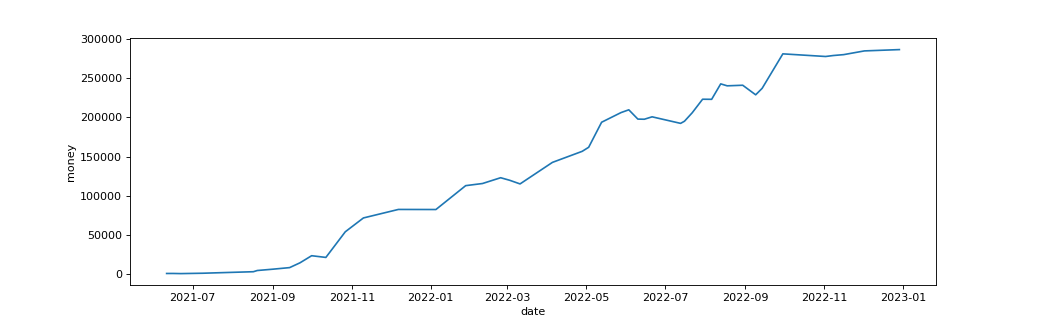

,money,price,options
count,1804.0,1804.0,1804.0
mean,135374.18093126165,1116.2117516629712,14.541019955654102
std,84239.83882300419,572.0935801061788,10.51628862352857
min,15.420000000000982,187.0,0.0
25%,62038.11499999911,764.0,5.0
50%,124560.77999999758,1019.5,13.0
75%,207713.1949999958,1302.25,23.0
max,286167.35999999783,6764.0,42.0


In [18]:
from matplotlib.pyplot import figure

figure(figsize=(13, 4), dpi=80)

df_trades = pd.DataFrame(trade_data)

field_to_plot = "money"
# df_trades_plot = df_trades_plot.copy()
# df_trades_plot = df_trades.loc[(df_trades["side"] == "sell")]
df_trades_plot = df_trades.loc[(df_trades["side"] == "sell") & (df_trades["options"] == 0)]

# field_to_plot = "options"
# df_trades_plot = df_trades.groupby(["date"]).max("options").reset_index()

plt.clf()
plt.plot(pd.to_datetime(df_trades_plot["date"]), df_trades_plot[field_to_plot])
plt.xlabel("date")
plt.ylabel(field_to_plot)
plt.show()
df_trades.describe().astype(str)

In [11]:
# Start $1000, 1 contract/day ITM, .02 max strike, 14 day fear/greed +/- 1
# End money: $43924.72 (4292.47%)
# Options: 308

# Start $1000, 1 contract/day ITM, .02 max strike, 14 day fear/greed +/- 1 w/ vix
# End money: $38710.76 (3771.08%)
# Options: 264

# Start $1000, 7 contract/day ITM, .02 max strike, 14 day fear/greed +/- 1 w/ vix
# End money: $271418.04 (27041.80%)
# Options: 1706

# Start $1000, 7 contract/day ITM, .02 max strike, 14 day fear/greed +/- 2 w/ vix
# End money: $284094.76 (28309.48%)
# Options: 1814

# Start $1000, 7 contract/day ITM/OTM, .02 max strike, 14 day fear/greed +/- 1 w/ vix
# End money: $240999.04 (23999.90%)
# Options: 1756

# Start $1000, 7 contract/day ITM, .02 max strike, 10 day fear/greed +/- 1 w/ vix <------------- best so far
# End money: $286167.36 (28516.74%)
# Options: 1804